In [2]:
import pickle
import os 
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

from utils import load_data, aggregate_statistics, plot_fitnesses, plot_distributions

This notebook interpret the results of basic run of symbolic regression - 30 applications of gems until it expires, replacement of the worst gem in jewellery box, 5 individuals in population.

# Aggregate statistics

In [17]:
mutations = [
        (single_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
    #    (probabilistic_mutation, MatchSMStrategy),
     #   (single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)]

folder = 'scripts/sym_5000_generations//'
data = aggregate_statistics(folder, mutations)
data.head()

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,bf,mf
0,single_mutation,MatchSMStrategy,0,10,0.339772,7.228551e+13,7.228551e+13,0.00,0.0,0.0,"[0.8676780722350717, 0.7112278041269767, 0.640...","[205.0711390532456, 12.973091544378866, 2186.4..."
1,single_mutation,MatchSMStrategy,0,50,0.256790,5.440428e+02,5.440428e+02,0.00,0.0,0.0,"[0.7034278686748779, 0.6551867347002897, 0.612...","[2846130.8491801806, 489.84034804429103, 25.48..."
2,single_mutation,MatchSMStrategy,0,100,0.184597,3.642753e+02,3.642753e+02,0.00,0.0,0.0,"[0.6985251186105657, 0.6478281685129331, 0.643...","[508170.9156819037, 1316.9284982777888, 105.09..."
3,single_mutation,MatchSMStrategy,5,10,0.240592,7.894087e+01,7.894087e+01,7.25,103.1,44.8,"[0.8272466848114923, 0.6461643788889658, 0.616...","[17621.92788124887, 144.9388227808154, 10.3049..."
4,single_mutation,MatchSMStrategy,5,50,0.209362,1.682823e+08,1.682823e+08,5.80,28.7,27.2,"[0.7435411648134345, 0.6634891556297996, 0.614...","[27826.575065974896, 491.81213413375536, 9102...."


In [ ]:
data.groupby(['mutation', 'strategy','gems']).median()

Overall, gems brough significant improvement in terms of best fitness achieved and mean of generation containing best fitness. Intersting observation is the slightly worse result in case of 10 gems.

Let's have a look at performance according to mutation and match strategy used.

In [ ]:
data.groupby(['mutation', 'strategy']).mean()

Best performance was achieved by probabilistic mutation, using match by all strategy. Let's have a look at its performance according to JBox size.

In [ ]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

An interesting observation here: on larger graphs, no gems were actually used. This could by due to very low probability of match by all strategy on larger graph. Only on small graphs (size 10) the gems were applied. Positive fact is, that even small number of gems applications on those small graphs leads to better results. 

What about peformance of gems with match by active strategy?

Will we observe similar behaviour on Match By All strategy with single mutation?

In [ ]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchByActiveStrategy' )].iloc[:,:-2]

In [ ]:
data[(data['mutation'] == 'single_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

Here, when it comes to 5 gems,the results are slightly better, in 10 gems case, the results are however slightly worse.

So we see, that best performance can be achieved by probabilistic mutation and match by all strategy and gems can further improve this performance, albeit slightly. Let's see which mutation performed worst and see effect of gems on this settings.

In [ ]:
data[data.gems == 0].groupby('mutation').mean()

As with *remove oldest* gem removal, worse performance was provided by single mutation. Let's have a closer look at that.

In [ ]:
data[(data['mutation'] == 'single_mutation')].groupby(['strategy', 'gems']).mean()

Interesting property is the worse performance of match by all strategy, when using 10 JBox size. We do not see this in case of *oldest removal*. Other than that, runs with gems yielded better results on average.

Let's plot the average best fitness of probabilistic and single mutations.

In [9]:
data['columns'] = data['columns'].astype(int)

In [36]:
def plot_fitnesses(data, columns, ylim):
    """
    Plot the fitnesses grouped by gems count
    """
    data = data[data['mutation'] == 'probabilistic_mutation']
    prob_data = data[(data['columns'] == columns)][['gems', 'bf']]
    plt_data = pd.DataFrame([*prob_data['bf']])
    plt_data['gems'] = prob_data['gems'].values

    fig, ax = plt.subplots(1,2)
    plt_data.groupby('gems').min().T.plot(ax=ax[0])
    plt_data.groupby('gems').mean().T.plot(ax=ax[1])
    ax[0].set_ylim(*ax[1].set_ylim(*ylim))
    ax[0].set_xlim(0, 1000)
    ax[0].set_title('best run')
    ax[1].set_title('mean of all runs')
    fig.suptitle(columns);

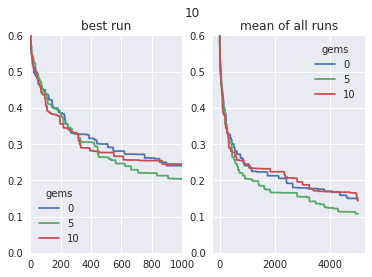

In [37]:
plot_fitnesses(data, 10, (0.0, 0.6))

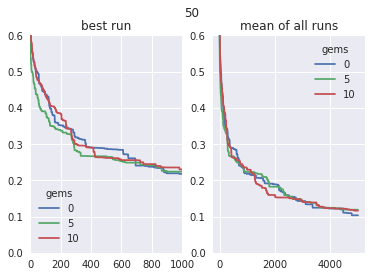

In [38]:
plot_fitnesses(data, 50, (0.0, 0.6))

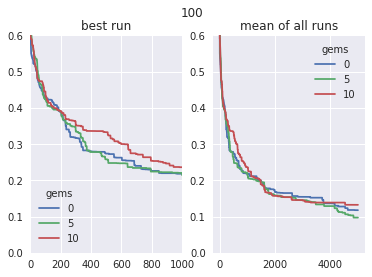

In [39]:
plot_fitnesses(data, 100, (0, 0.6))

In [ ]:
ax = plot_distributions(folder, mutations)
ax.set_xlabel('Mean squared error')
plt.savefig('test.pdf', format='pdf', dpi=1000)

# Conclusion

Gems were able to improve performance in almost all instances of experiment. Best performance overall was achieved by 